In [2]:
# Predicting Survival in the Titanic Data Set
# We will be using a decision tree to make predictions about the Titanic data
# set from Kaggle. This data set provides information on the Titanic
# passengers and can be used to predict whether a passenger survived or
# not.

# titanic.columns =
# ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ti
# cket','Fare','Cabin','E mbarked']
# You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
# (Parents/children aboard), and Fare to predict whether a passenger
# survived.

In [1]:
#Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report



In [2]:
url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

In [4]:
#Get a count of the number of survivors
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

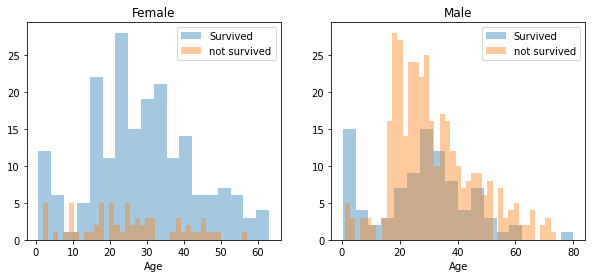

In [6]:
survived = 'Survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic[titanic['Sex']=='female']
men = titanic[titanic['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

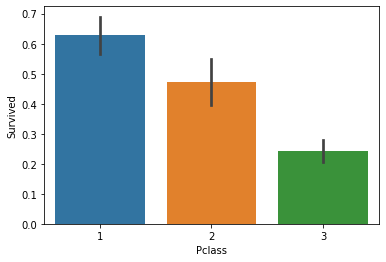

In [7]:
sns.barplot(x='Pclass', y='Survived', data=titanic)


<AxesSubplot:xlabel='Age'>

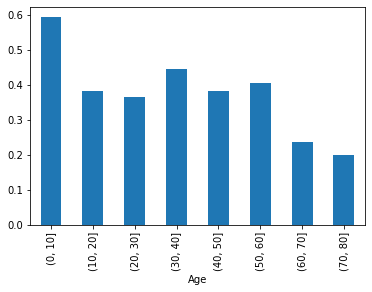

In [8]:
group_by_age = pd.cut(titanic["Age"], np.arange(0, 90, 10))
age_grouping = titanic.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()

In [9]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# will drop ‘PassengerId’,'Name','Embarked' from the train set, because it does not contribute to a persons survival probability.
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis=1)

In [11]:
data = [titanic]

for dataset in data:
    mean = titanic["Age"].mean()
    std = titanic["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = titanic["Age"].astype(int)
titanic["Age"].isnull().sum()

0

In [12]:
# Converting “Fare” from float to int64
data = [titanic]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [13]:
# Convert ‘Sex’ feature into numeric.
genders = {"male": 0, "female": 1}
data = [titanic]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [49]:
from sklearn.model_selection import train_test_split
X= titanic.drop(['Survived'],axis=1)
y = titanic["Survived"]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [50]:
from sklearn import preprocessing,tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.7597765363128491

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = clf.predict(X_test)

In [52]:
Accuracy = accuracy_score(Y_test,y_pred)
Accuracy

0.7597765363128491

In [53]:
conf_matrix = confusion_matrix(Y_test,y_pred)
conf_matrix

array([[84, 21],
       [22, 52]], dtype=int64)

In [54]:
print(f"cf_report: {classification_report(Y_test,y_pred)}")

cf_report:               precision    recall  f1-score   support

           0       0.79      0.80      0.80       105
           1       0.71      0.70      0.71        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



In [55]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

X_t = scalar.fit_transform(X)

In [56]:
x_train,x_test,y_train,y_test = train_test_split(X_t,y,test_size = 0.30, random_state= 101)

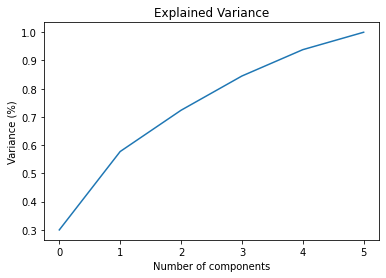

In [57]:
from sklearn.decomposition import PCA
pca = PCA()
p_components = pca.fit_transform(X_t)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [58]:
pca = PCA(n_components=5)
new_data = pca.fit_transform(X_t)

principal_x = pd.DataFrame(new_data, columns=['PC-1','PC-2','PC-3','PC-4','PC-5'])


In [59]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 101)
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier()
Dtc.fit(x_train,y_train)
Dtc.score(x_test,y_test)

0.7761194029850746

In [60]:
#by tuning hyper parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}


In [61]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=Dtc, param_grid=grid_param,cv =5,n_jobs=-1)

In [62]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [63]:
best_parameters=grid_search.best_params_
print(best_parameters)

grid_search.best_score_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 8, 'splitter': 'random'}


0.8202451612903225

In [70]:
Dtc2 = DecisionTreeClassifier(criterion = 'entropy', max_depth =5, min_samples_leaf= 9,min_samples_split=8, splitter ='random')
Dtc2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=9,
                       min_samples_split=8, splitter='random')

In [71]:
Dtc2.score(x_test,y_test)


0.7649253731343284